In [19]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [20]:
from src.data_processors import merge_data
from scripts.data_analysis import analyze_distribution
from scripts.outlier_removal import remove_outliers,remove_outliers_zscore
from scripts.clean_data import clean_dataframe
from scripts.time_series_analysis import plot_time, plot_time_interactive
from scripts.load_data import load_csv_file

In [21]:
files = {
    'benin-malanville.csv': 'Benin',
    'sierraleone-bumbuna.csv': 'Sierra Leone',
    'togo-dapaong_qc.csv': 'Togo'
}
output_filename = 'merged_data.csv'
preprocessed_data = load_csv_file('togo-dapaong_qc.csv')
#preprocessed_data = merge_data(files, country_map=files, output_filename=output_filename)
print("Preprocessed Data Preview:")
print(preprocessed_data.head(10))  # 

Attempting to load file at: /workspaces/solar-farm-insights/data/togo-dapaong_qc.csv
Preprocessed Data Preview:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
5  2021-10-25 00:06 -1.2  0.0  0.0   0.0   0.0  24.9  93.9  1.2     1.4   
6  2021-10-25 00:07 -1.1  0.0  0.0   0.0   0.0  24.9  93.8  1.2     1.4   
7  2021-10-25 00:08 -1.1  0.0  0.0   0.0   0.0  24.9  93.7  1.1     1.4   
8  2021-10-25 00:09 -1.1  0.0  0.0   0.0   0.0  24.9  93.6  1.0     1.4   
9  2021-10-25 00:10 -1.1  0.0  0.0   0.0   0.0  24.9  93.4  0.9     1.4   

   WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  TM

In [22]:
numeric_columns = preprocessed_data.select_dtypes(include=['int64', 'float64']).dropna(axis=1, how='all').columns
summary_stats = preprocessed_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns:")
print(summary_stats)

Summary Statistics for Numeric Columns:
               GHI         DNI         DHI        ModA        ModB       Tamb  \
mean    236.385408  226.627336   84.831976  255.078668  246.040213  27.177431   
median   -1.500000    0.000000    0.000000    0.400000    0.400000  26.600000   
std     323.187417  307.836598  112.592274  345.792539  333.983553   5.216108   

               RH        WS    WSgust   WSstdev          WD   WDstdev  \
mean    34.996092  2.226743  2.978942  0.510259  109.331825  9.245667   
median  28.200000  2.100000  2.600000  0.500000   80.800000  9.100000   
std     21.158801  1.397271  1.795337  0.249776   81.104365  5.856843   

                BP  Cleaning  Precipitation      TModA      TModB  
mean    976.245859  0.000351       0.000069  30.930934  31.904767  
median  976.000000  0.000000       0.000000  25.900000  25.900000  
std       1.902708  0.018724       0.005274  11.490341  12.934462  


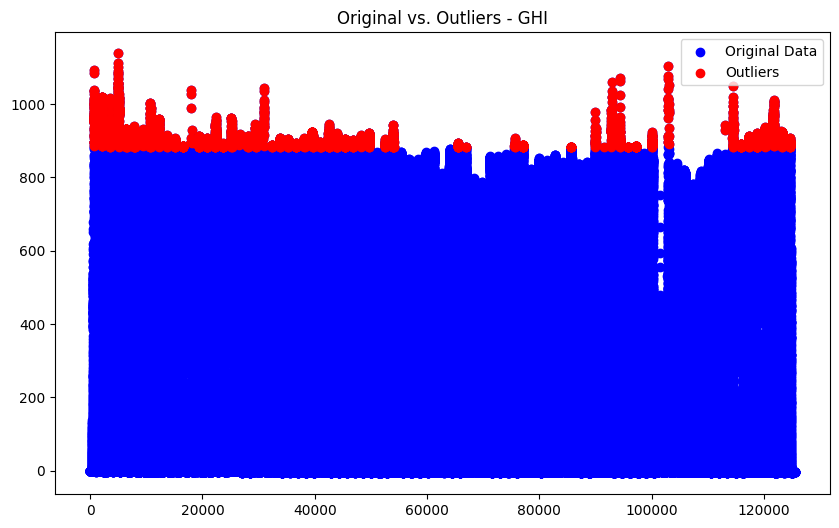

Column: GHI
Original Rows: 125463
Rows After Filtering: 121733
Removed Outliers: 3730



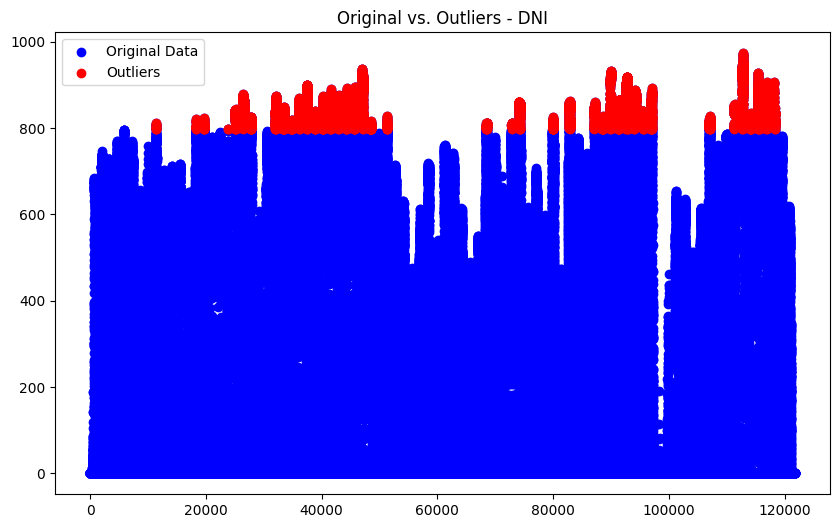

Column: DNI
Original Rows: 125463
Rows After Filtering: 116242
Removed Outliers: 9221



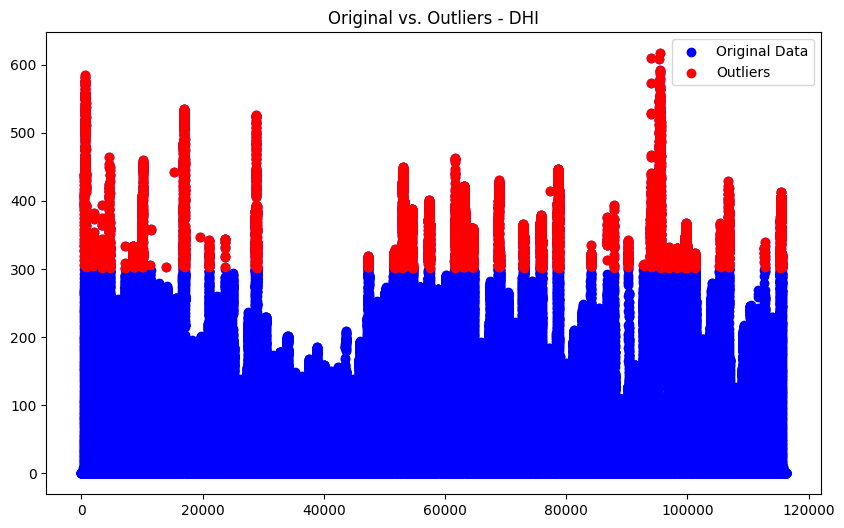

Column: DHI
Original Rows: 125463
Rows After Filtering: 109566
Removed Outliers: 15897



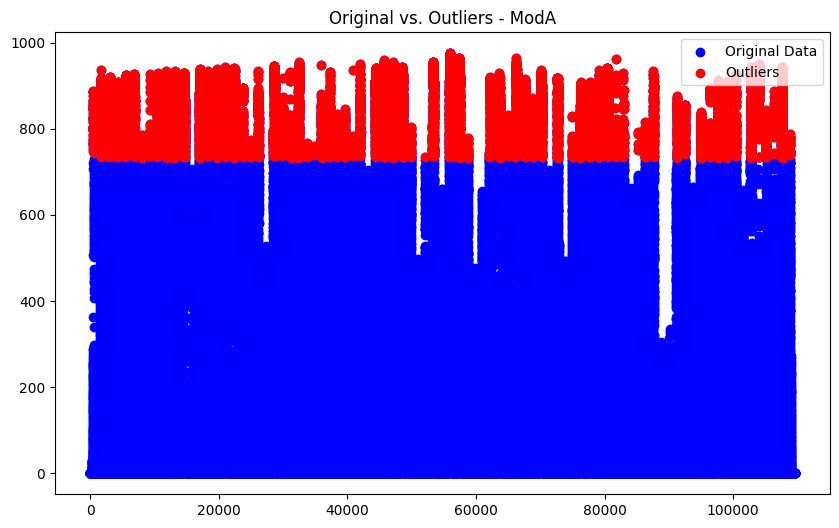

Column: ModA
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



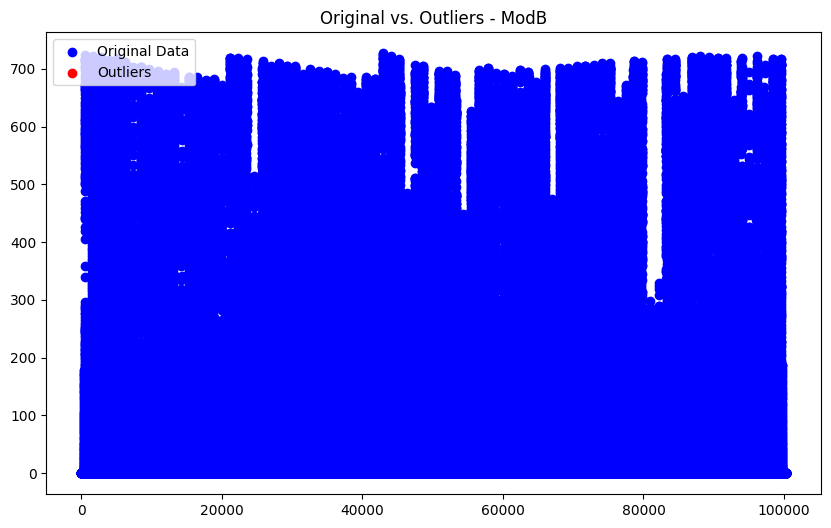

Column: ModB
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



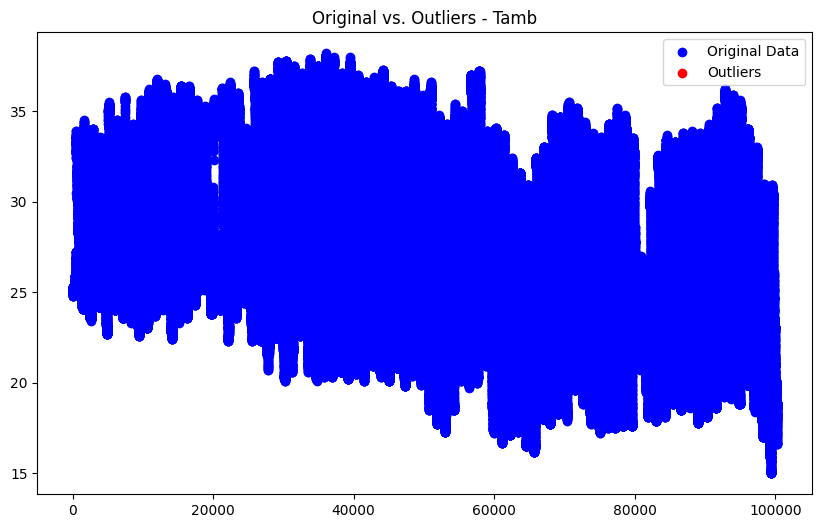

Column: Tamb
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



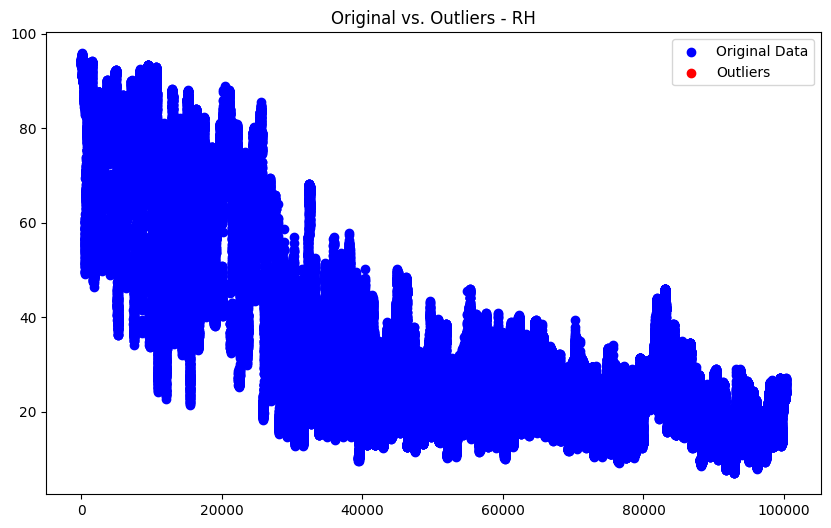

Column: RH
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



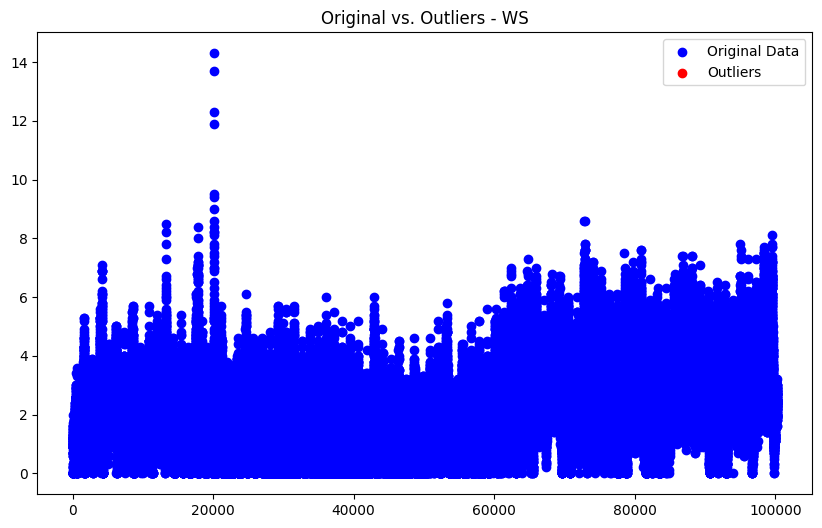

Column: WS
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



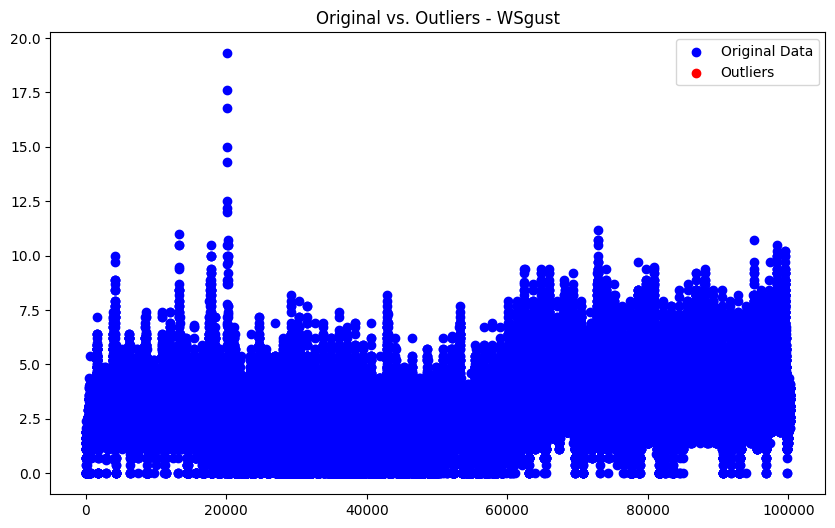

Column: WSgust
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



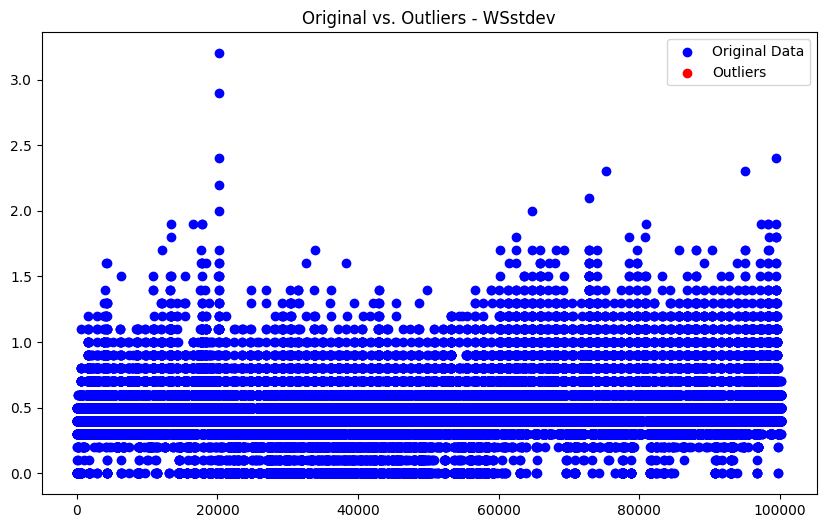

Column: WSstdev
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



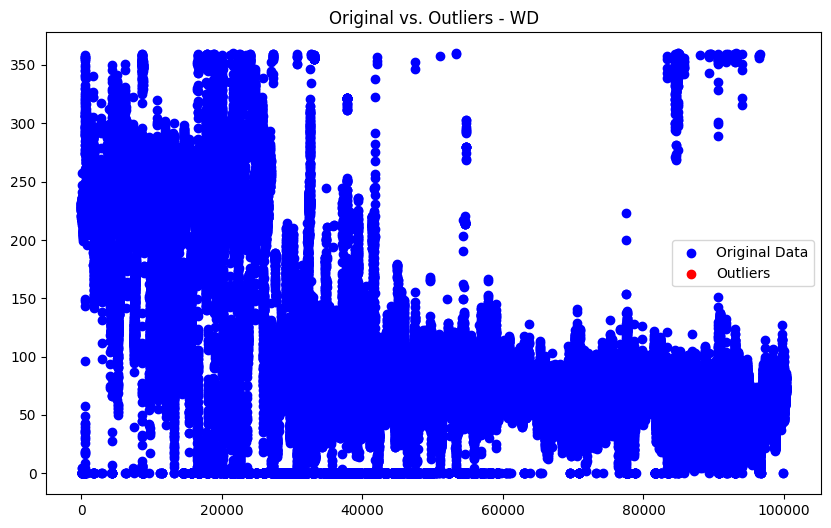

Column: WD
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



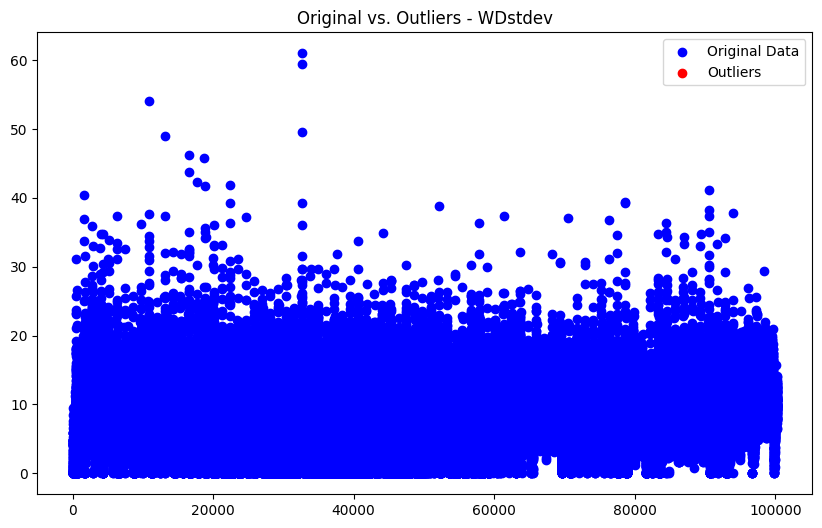

Column: WDstdev
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



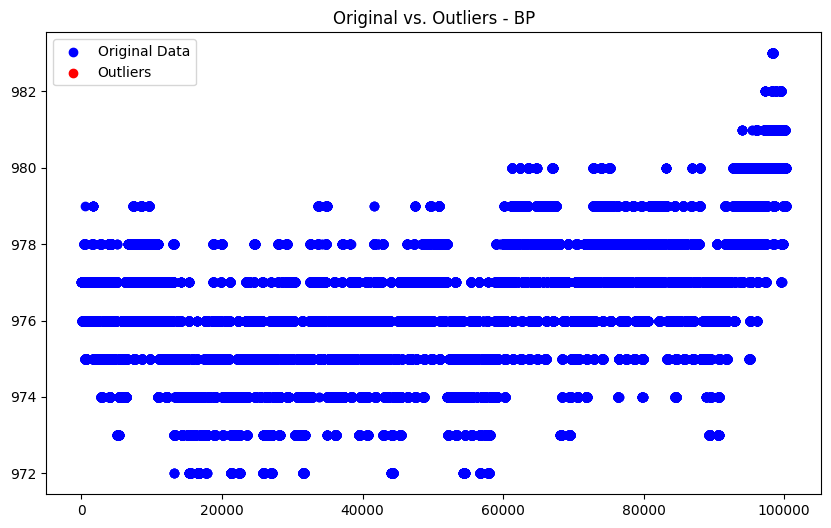

Column: BP
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



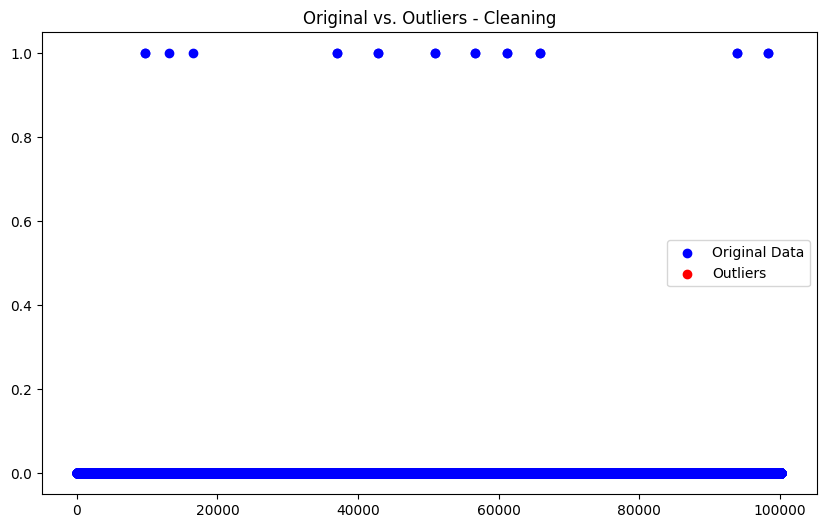

Column: Cleaning
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



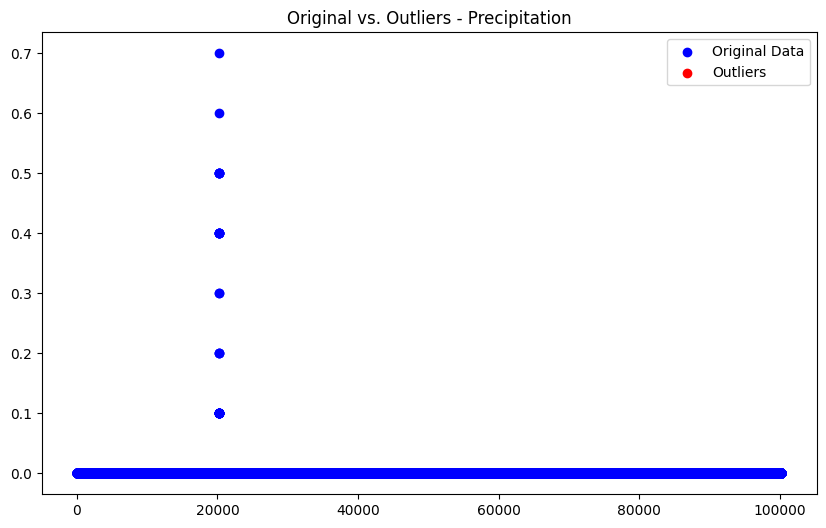

Column: Precipitation
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



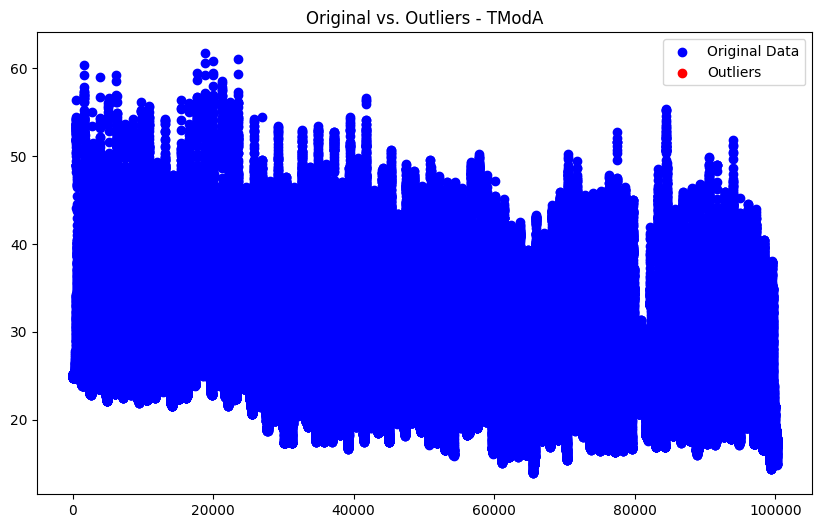

Column: TModA
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201



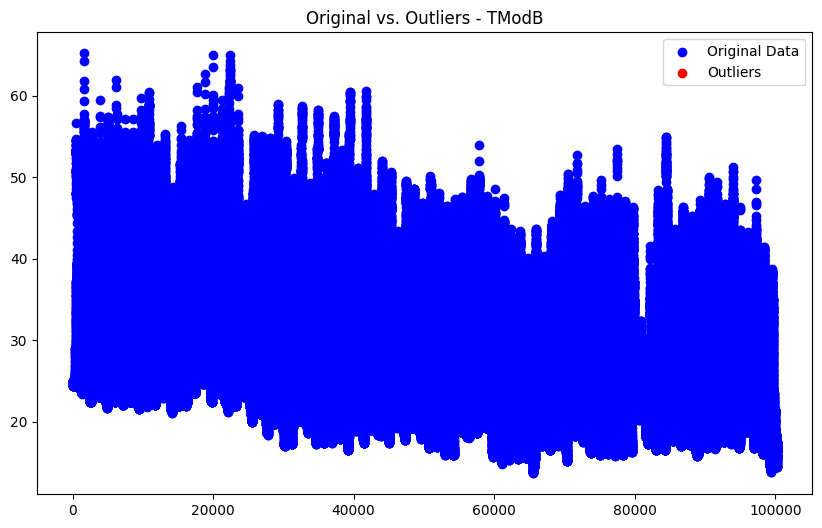

Column: TModB
Original Rows: 125463
Rows After Filtering: 100262
Removed Outliers: 25201

Summary Statistics for Numeric Columns After Outlier removal:
               GHI         DNI       DHI        ModA        ModB       Tamb  \
mean    100.283965  114.697076  44.74175  109.492678  105.247421  25.855125   
median   -2.500000    0.000000   0.00000    0.000000    0.000000  25.300000   
std     187.343251  213.480096  75.36373  199.764902  192.202923   4.832909   

               RH        WS    WSgust   WSstdev          WD   WDstdev  \
mean    37.192184  1.918917  2.546523  0.451066  105.910292  7.820447   
median  29.700000  1.900000  2.400000  0.400000   78.600000  7.800000   
std     21.308792  1.191807  1.503726  0.207942   79.652972  5.040478   

                BP  Cleaning  Precipitation      TModA      TModB  
mean    976.159175  0.000199       0.000087  26.747277  27.071356  
median  976.000000  0.000000       0.000000  24.200000  24.100000  
std       1.902083  0.014122      

In [ ]:
#clean_dataframe = clean_dataframe(preprocessed_data)
#distribution_recommendations = analyze_distribution(preprocessed_data.head(10000), numeric_columns)
cleaned_data = preprocessed_data.copy()
cleaned_data = remove_outliers_zscore(cleaned_data,numeric_columns,2,True)

# for col, method in preprocessed_data.items():
#     cleaned_data = remove_outliers(cleaned_data, [col], method="zscore")
#     # if method == "z-score":
#     #     print(f"Removing outliers using Z-score for {col}")
#     #     cleaned_data = remove_outliers(cleaned_data, [col], method="zscore")
#     # elif method == "iqr":
#     #     print(f"Removing outliers using IQR for {col}")
#     #     cleaned_data = remove_outliers(cleaned_data, [col], method="iqr")

cleaned_data.to_csv("../cleaned_data.csv", index=False)
summary_stats = cleaned_data[numeric_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numeric Columns After Outlier removal:")
print(summary_stats)

                GHI         DNI        DHI       Tamb
Month                                                
2021-10  102.984519  108.324812  50.329008  27.571731
2021-11  102.303481  129.307775  40.805839  27.555977
2021-12   98.016581  107.908826  45.875376  24.858846
2022-01   99.830565  105.309525  46.995711  24.210698


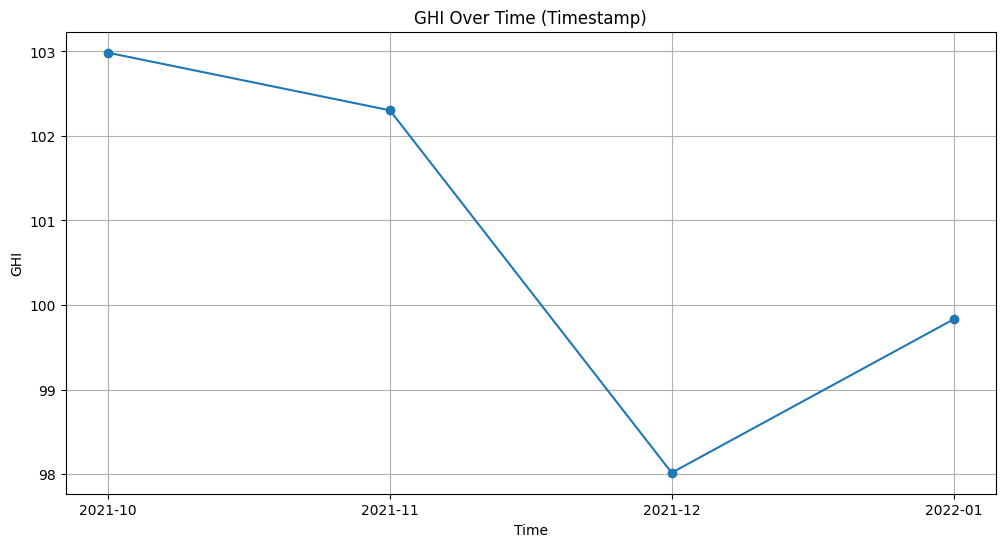

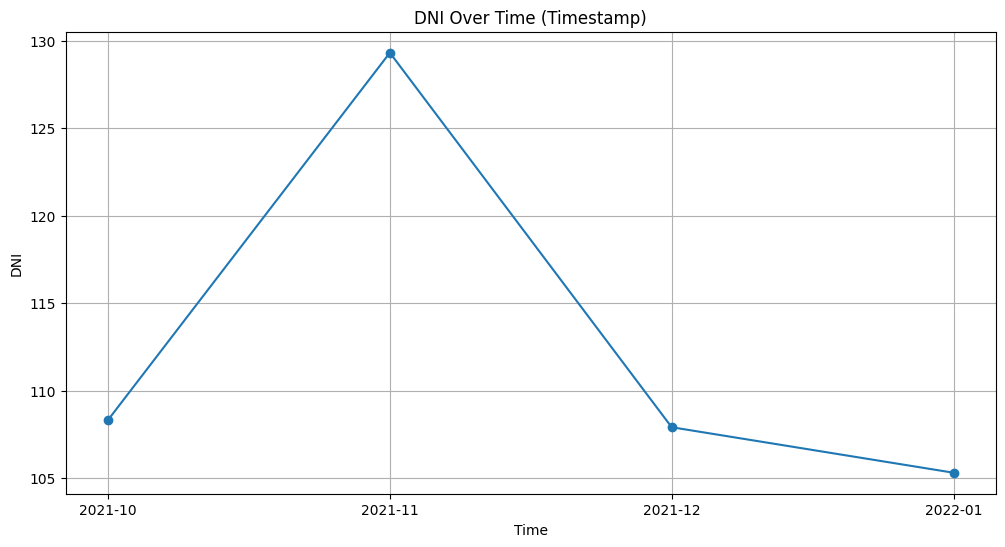

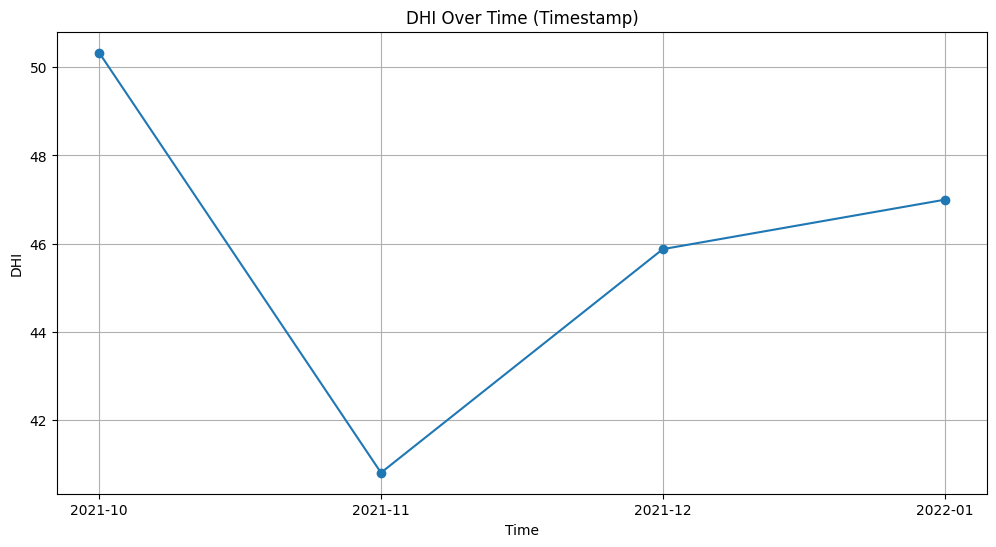

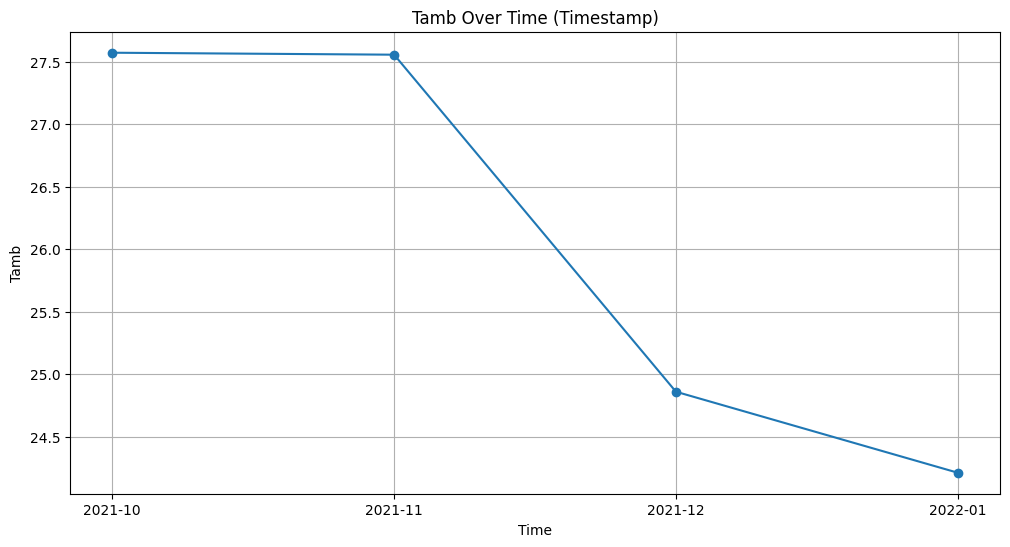

In [26]:
time_column = 'Timestamp'
ghi_metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
sensor_columns = ['ModA', 'ModB']
cleaning_column = 'Cleaning'

plot_time(cleaned_data, time_column, ghi_metrics)